In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")
library("speedyseq")
library(ComplexUpset)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
microViz version 0.12.7 - Copyright (C) 2021-2025 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For cita

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))


In [4]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 280 samples ]:
sample_data() Sample Data:        [ 280 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

ps_merge = merge_samples2(ps, "Tag")
ps_merge

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 186 samples ]:
sample_data() Sample Data:        [ 186 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [6]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

select =c("Ambient_Placebo", "NH4_Pathogen")
#only nutrient and placebo
ps_placebo_un =subset_samples(ps_paired, Combo %in% select)
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 151 samples ]:
sample_data() Sample Data:        [ 151 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 74 samples ]:
sample_data() Sample Data:        [ 74 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [7]:
ps_placebo_un_fill = filter_taxa(ps_placebo_un, function(x) sum(x) > 50, TRUE) %>% tax_fix()
ps_placebo_un_fill
                           
                                                                                    

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 1607 taxa and 74 samples ]:
sample_data() Sample Data:        [ 74 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 1607 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 1607 tips and 1402 internal nodes ]:
taxa are rows

In [8]:
sample_data(ps_placebo_un_fill) %>%
  group_by(Combo, Health) %>%
  summarize(count = n())

`summarise()` has grouped output by 'Combo'. You can override using the
`.groups` argument.


Combo,Health,count
<chr>,<chr>,<int>
Ambient_Placebo,AH,28
NH4_Pathogen,AH,19
NH4_Pathogen,DL,27


In [9]:
set.seed(123)
output = ancombc2(data = ps_placebo_un_fill , tax_level = "ASVs",
                  fix_formula = "Combo", 
                  #rand_formula = "(1| Genotype)",
                  p_adj_method = "holm",  pairwise = TRUE,
                  group = "Combo",struc_zero = TRUE, alpha = 0.001,
                  dunnet = TRUE,
                  n_cl=4, prv_cut = 0, lib_cut = 1000
                  #lme_control = lme4::lmerControl()
                 )
        

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Combo

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, collection_date, Date, TimePoint, Replicate, Genotype, label, Nursery, Lat, Long, lat_long, organism, geo_loc_name, env_local_scale, env_broad_scale, env_medium, waterBody, countryCode, amplicon_sequenced, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, filter_unpair, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR

PASS

Checking 

In [10]:
res=output$res
head(res)

dim(res)

taxa_df = tax_table(ps_placebo_un_fill) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

df_fig = res %>% left_join(taxa_df, by = "taxon")
dim(df_fig)
head(df_fig)

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),q_ComboNH4_Pathogen,diff_(Intercept),diff_ComboNH4_Pathogen,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,3e25ffb24420d1120183e84047dd818e,0.11312952,-0.11346773,0.02976914,0.1258078,3.800228,-0.9019134,0.01909992,0.41810132,1,1,FALSE,FALSE,TRUE,TRUE
2,5d4ffc5706f79f0d822db633c16f0fa5,0.47820848,-0.82372797,0.02767470,0.1222540,17.279630,-6.7378424,0.03680116,0.09379951,1,1,FALSE,FALSE,TRUE,TRUE
3,4024e22b8908b65e2669f0308f75d153,-0.16963577,0.25458451,0.02767470,0.1224359,-6.129634,2.0793284,1.00000000,1.00000000,1,1,FALSE,FALSE,FALSE,TRUE
4,3d7dc7a8ca02340e098384c356798bf6,-1.08803999,2.63349847,0.02767470,0.1224359,-39.315338,21.5091962,1.00000000,1.00000000,1,1,FALSE,FALSE,TRUE,TRUE
5,d1525c3fa5ef9858663670393a6771a1,-0.06429851,0.01803792,0.02767470,0.1225635,-2.323368,0.1471720,0.14579970,0.89649263,1,1,FALSE,FALSE,TRUE,TRUE
6,a8b250b681965ca88b715823b30b122b,-0.19301449,0.37410365,0.02767470,0.1269443,-6.974403,2.9469916,0.09066155,0.20826188,1,1,FALSE,FALSE,TRUE,TRUE


[1] 334  15

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,e7053ff6c11d7fb2ada9ebee52ea34a9,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,ASV_9187
2,bc4682b979d8c7946a501be2aec727e2,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_III,g__Clade_III,g__Clade_III Genus,ASV_7439
3,5566f2bb52e12706c798bdb000111ba7,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_3440
4,1194824923072bb7da1a9ff0723d533f,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_708
5,87ebfc9019eea82dd021b2bb07ffbba3,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_5434
6,07cf9cd952dfdc87f7314484b81a1298,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Parvibaculales,f__Parvibaculaceae,g__Pyruvatibacter,s__Pyruvatibacter_mobilis,ASV_302


[1] 334  23

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3e25ffb24420d1120183e84047dd818e,0.11312952,-0.11346773,0.02976914,0.1258078,3.800228,-0.9019134,0.01909992,0.41810132,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kordiimonadales,f__uncultured,g__uncultured,s__uncultured_Kordiimonas,ASV_2500
2,5d4ffc5706f79f0d822db633c16f0fa5,0.47820848,-0.82372797,0.02767470,0.1222540,17.279630,-6.7378424,0.03680116,0.09379951,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_3738
3,4024e22b8908b65e2669f0308f75d153,-0.16963577,0.25458451,0.02767470,0.1224359,-6.129634,2.0793284,1.00000000,1.00000000,1,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_2577
4,3d7dc7a8ca02340e098384c356798bf6,-1.08803999,2.63349847,0.02767470,0.1224359,-39.315338,21.5091962,1.00000000,1.00000000,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_2478
5,d1525c3fa5ef9858663670393a6771a1,-0.06429851,0.01803792,0.02767470,0.1225635,-2.323368,0.1471720,0.14579970,0.89649263,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_8305
6,a8b250b681965ca88b715823b30b122b,-0.19301449,0.37410365,0.02767470,0.1269443,-6.974403,2.9469916,0.09066155,0.20826188,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_6686


In [11]:
taxa_df = tax_table(ps_placebo_un_fill) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,e7053ff6c11d7fb2ada9ebee52ea34a9,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,c__Alphaproteobacteria Class,ASV_9187
2,bc4682b979d8c7946a501be2aec727e2,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_III,g__Clade_III,g__Clade_III Genus,ASV_7439
3,5566f2bb52e12706c798bdb000111ba7,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_3440
4,1194824923072bb7da1a9ff0723d533f,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_708
5,87ebfc9019eea82dd021b2bb07ffbba3,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_5434
6,07cf9cd952dfdc87f7314484b81a1298,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Parvibaculales,f__Parvibaculaceae,g__Pyruvatibacter,s__Pyruvatibacter_mobilis,ASV_302


In [12]:
df_fig = res %>% left_join(taxa_df, by = "taxon") %>%
#filter(lfc_ComboNH4_Pathogen < -.5 | lfc_ComboNH4_Pathogen > .5)  %>%
filter(passed_ss_ComboNH4_Pathogen == "TRUE") %>%
filter(p_ComboNH4_Pathogen<=0.01)
dim(df_fig)
head(df_fig)
write_csv(df_fig, "/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_Nutri_disease.csv")

[1] 43 23

,taxon,lfc_(Intercept),lfc_ComboNH4_Pathogen,se_(Intercept),se_ComboNH4_Pathogen,W_(Intercept),W_ComboNH4_Pathogen,p_(Intercept),p_ComboNH4_Pathogen,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ef6c1ba3806541ebf351ab0fcb95fb75,0.5767042,-0.7743901,0.02767470,0.1254952,20.838683,-6.170676,4.712989e-06,0.001627774,0.001385619,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_9501
2,73a7fd37f899efcd218459560acd8e38,0.4389021,-0.4663228,0.02767470,0.1208273,15.859328,-3.859415,3.987595e-06,0.008367982,0.001176340,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_4635
3,09f2b55ea4f56193699d46368ecbff40,-0.3448548,0.5456903,0.04829436,0.1247718,-7.140685,4.373507,9.798484e-05,0.002369318,0.026749861,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388
4,6a0c68e241fa05fa8e12abab05ecd055,-1.6317997,2.4020910,0.02767470,0.1261858,-58.963600,19.036139,2.875045e-04,0.002748205,0.073888663,⋯,FALSE,TRUE,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Acanthopleuribacterales,f__Acanthopleuribacteraceae,g__Acanthopleuribacter,s__Acanthopleuribacter_pedis,ASV_4245
5,27dbb0e4b4920b6681df8a9e99c241b5,0.1739543,-0.7899374,0.07620783,0.1424459,2.282631,-5.545527,8.454091e-02,0.005171839,1.000000000,⋯,TRUE,TRUE,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,g__Spirochaeta_2 Genus,ASV_1594
6,51fb5f662d6e879751291f1080a03a1e,0.1167900,-0.5677441,0.07924591,0.1394609,1.473767,-4.070990,2.005440e-01,0.009624590,1.000000000,⋯,TRUE,TRUE,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,g__Spirochaeta_2 Genus,ASV_3311


In [13]:


combo_labs <- as_labeller(c("NH4" = "NH[4]+Disease",
                          "Ambient" = "Ambient+Placebo"), default = label_parsed)


F1 <- df_fig %>%
 filter(passed_ss_ComboNH4_Pathogen == "TRUE") %>%
  mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "c__", ""))) %>%
  mutate(
    direction = ifelse(lfc_ComboNH4_Pathogen > 0, "NH4", "Ambient"),
    direction = factor(direction, levels = c("Ambient", "NH4"))
  ) %>%
  ggplot(aes(x = reorder(ASVs, lfc_ComboNH4_Pathogen), y = lfc_ComboNH4_Pathogen, fill = direction)) +
  geom_bar(stat = "identity", color = "black") +
  geom_errorbar(aes(ymin = lfc_ComboNH4_Pathogen - se_ComboNH4_Pathogen, 
                    ymax = lfc_ComboNH4_Pathogen + se_ComboNH4_Pathogen), width = 0.2) +
  coord_flip() +
  labs(
    x = "ASVs",
    y = "Log2 Fold Change",
    fill = "Direction"
  ) +
  scale_fill_manual(values = c("NH4" = "#bc6767", "Ambient" = "lightblue")) +
  facet_grid(Order ~
             direction, 
             space = "free", scales = "free",
             switch = "y",  labeller = labeller(direction = combo_labs)) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = 3.5),
    axis.text.y = element_blank(),
    strip.text.x = element_text(size = 4.5),
    strip.text.y = element_blank(),
    #  strip.text.y = element_text(size=5),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    legend.position = "none",
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) 


In [14]:
psr_fill_melt = ps_placebo_un_fill  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()   


taxa_fil= df_fig %>% column_to_rownames("taxon")%>%
as.matrix


ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(taxa_fil))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                     Pairs=="paired" & Combo %in% select )
ps_ancom_APa


psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()  


phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 43 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 43 taxa by 22 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 43 taxa and 74 samples ]:
sample_data() Sample Data:        [ 74 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 43 taxa by 22 taxonomic ranks ]:
taxa are rows


Ambient     NH4 
    281     145 


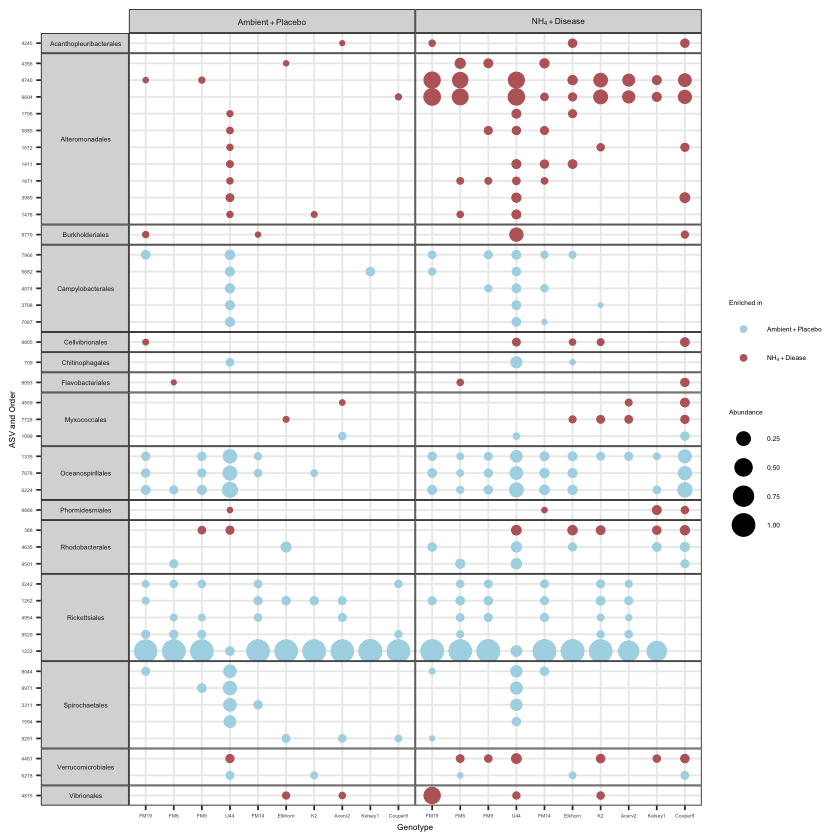

In [15]:

library(stringr)
psr_fill_melt <- psr_fill_melt %>%
  mutate(Combo = factor(Combo, levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen")))
# Define labellers
combo_labs <- as_labeller(c(
  "Ambient_Placebo" = "Ambient+Placebo",
  "Ambient_Pathogen" = "Ambient~Disease",
  "NH4_Placebo" = "NH[4]~Placebo",
  "NH4_Pathogen" = "NH[4]+Disease"
), default = label_parsed)


lab1 <- c(expression(Ambient+Placebo),
          
          expression(NH[4]+Diease))
# Plot
F2 <- psr_fill_melt %>%
  as.data.frame() %>%
  mutate(
    Abundance = as.numeric(as.character(Abundance)),
    lfc_ComboNH4_Pathogen = as.numeric(str_trim(as.character(lfc_ComboNH4_Pathogen)))
  ) %>%
  filter(
    passed_ss_ComboNH4_Pathogen == "TRUE",
    Abundance > 0,
    !is.na(Severity)
  ) %>%
  mutate(
    Enriched  = ifelse(lfc_ComboNH4_Pathogen > 0, "NH4", "Ambient")
  ) %>%
  { print(table(.$Enriched)); . } %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "c__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%

  ggplot(aes(x = Genotype, y = reorder(ASVs, lfc_ComboNH4_Pathogen))) +
  geom_point(aes(size = Abundance, color = Enriched)) +
  scale_color_manual("Enriched in", values = c("lightblue", "#bc6767"),labels=lab1) +
  facet_grid(
    Order ~ Combo,
    space = "free",
    scales = "free",
    switch = "y",
      labeller = labeller(Combo = combo_labs
    )
  ) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 3),
    axis.text.y = element_text(size = 3),
    strip.text.y = element_text(size = 4),
    strip.text.y.left = element_text(angle = 0),
    strip.text.x = element_text(size = 5),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4),
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) +
#theme(axis.text.x = element_text(angle = 20, hjust = 1)) +
#guides(fill = guide_legend(keywidth = 0.30, , keyheight =.60, ncol=1)) +
  ylab("ASV and Order")
F2

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x

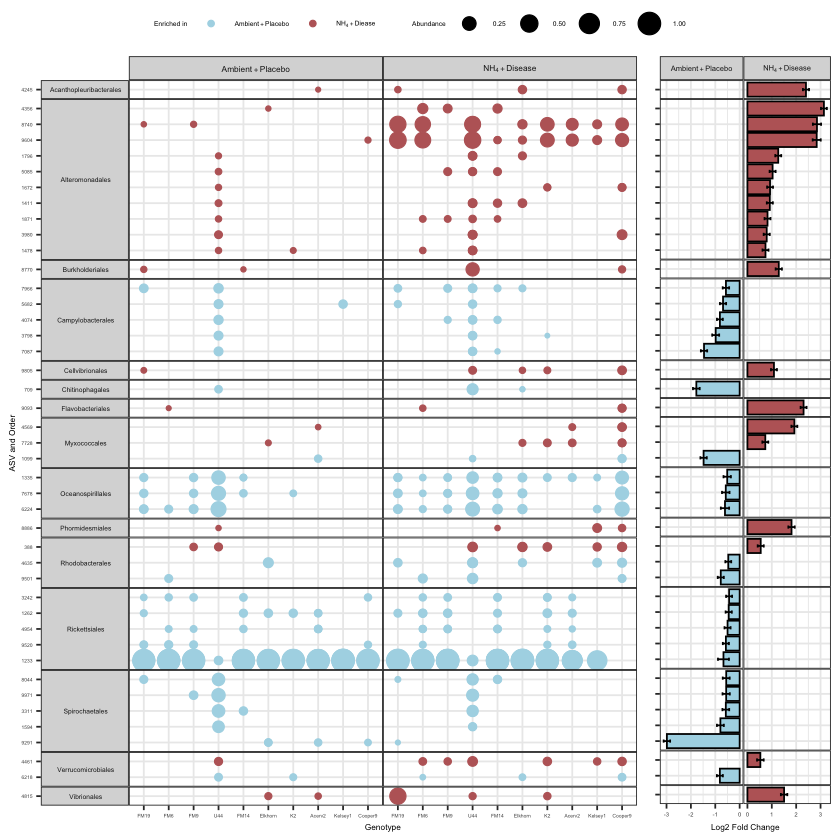

In [16]:
 ggpubr::ggarrange(F2, F1, common.legend = TRUE, legend = "top",
                   widths=c(2,0.6))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig5.png", 
      width = 6.5, height = 5, units = "in", dpi=300)

In [17]:
# Read ancombc output from placebo vs treatment comparisons 


# Load data
disease <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_disease.csv") %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>%
filter(lfc_ComboAmbient_Pathogen > 0) 
dim(disease)
nutri <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_nutrients.csv") %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>% 
filter(lfc_ComboNH4_Placebo > 0) 
dim(nutri)
nutri_disease <- read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_Nutri_disease.csv") %>% 
filter(lfc_ComboNH4_Pathogen > 0)  %>%
mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "")  %>%
mutate_if(is.character, str_replace_all, pattern = "c__", replacement = "") 
dim(nutri_disease)

# Create presence/absence columns for each set
join_data <- full_join(disease %>% select(ASVs) %>% mutate(Disease = TRUE),
                        nutri %>% select(ASVs) %>% mutate(Nutri = TRUE),
                        by = "ASVs") %>%
              full_join(nutri_disease %>% select(ASVs) %>% mutate(Nutri_Disease = TRUE),
                        by = "ASVs") 



[1] 15 23

[1] 24 23

[1] 20 23

In [18]:
# make into present/absent dataframe
upset_data <- join_data %>%
 left_join(nutri %>% select(ASVs, Order) %>% rename(Order_nutri = Order), by = "ASVs") %>%
  left_join(disease %>% select(ASVs, Order) %>% rename(Order_disease = Order), by = "ASVs") %>%
  left_join(nutri_disease %>% select(ASVs, Order) %>% rename(Order_nutri_disease = Order), by = "ASVs") %>%
  mutate(Order = coalesce(Order_disease, Order_nutri, Order_nutri_disease)) %>%
  select(-Order_nutri, -Order_disease, -Order_nutri_disease) %>% rename(
    `Ammonia+Placebo` = Nutri,
    `Ambient+Disease` = Disease,
    `Ammonia+Disease` = Nutri_Disease
  ) %>%
  mutate(across(c("Ambient+Disease", "Ammonia+Placebo", "Ammonia+Disease"),
                ~replace_na(., FALSE)))
upset_data %>% arrange (Order) %>% head()

,ASVs,Ambient+Disease,Ammonia+Placebo,Ammonia+Disease,Order
,<chr>,<lgl>,<lgl>,<lgl>,<chr>
1,ASV_4245,FALSE,TRUE,TRUE,Acanthopleuribacterales
2,ASV_8740,TRUE,FALSE,TRUE,Alteromonadales
3,ASV_3091,TRUE,TRUE,FALSE,Alteromonadales
4,ASV_9604,TRUE,TRUE,TRUE,Alteromonadales
5,ASV_9717,FALSE,TRUE,FALSE,Alteromonadales
6,ASV_1130,FALSE,TRUE,FALSE,Alteromonadales


In [19]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta))
ps
first_hom=c("N87-Hom-D", "N87-Hom-D-R2")


ps_homgenate=subset_samples(ps, Type=="Homogenate"& sample_names %in% first_hom)
ps_homgenate

ps_homgenate = filter_taxa(ps_homgenate, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_homgenate 


melt_homogenate   <- ps_homgenate %>%                  
  #tax_glom(taxrank = "Family") %>%
  psmelt() %>%
  distinct(OTU) %>% 
pull(OTU)

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 280 samples ]:
sample_data() Sample Data:        [ 280 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 2 samples ]:
sample_data() Sample Data:        [ 2 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 266 taxa and 2 samples ]:
sample_data() Sample Data:        [ 2 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 266 taxa by 8 taxonomic ranks ]:
taxa are rows

In [20]:
# 1. Extract tax_table as a data.frame
tax_df <- as.data.frame(tax_table(ps_homgenate))
head(tax_df)
# 2. Add ASV IDs as a column
tax_df$ASVs <- tax_df$ASVs

head(tax_df$ASVs)
# 3. Create a 'homogenate' presence column, set all to TRUE (since all ASVs are from ps_homgenate)
tax_df$Homogenate <- TRUE

# 4. Keep only the 'ASVs', 'homogenate', and 'Order' columns (or add more taxonomy if needed)
formatted_tax <- tax_df[, c("ASVs", "Homogenate", "Order")]

head(formatted_tax)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
660989d135c32adbda92de9dcb42e8ac,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,NA,ASV_4081
cff058569d42d4269cf5defaa1744a49,d__Bacteria,p__Marinimicrobia_(SAR406_clade),c__Marinimicrobia_(SAR406_clade),o__Marinimicrobia_(SAR406_clade),f__Marinimicrobia_(SAR406_clade),g__Marinimicrobia_(SAR406_clade),s__Alteromonas_macleodii,ASV_8252
2b142a17f059a3466d2489ec8363baec,d__Bacteria,p__Bdellovibrionota,c__Bdellovibrionia,o__Bacteriovoracales,f__Bacteriovoracaceae,g__Halobacteriovorax,s__uncultured_phototrophic,ASV_1717
3c783d612386a2fb9b066f8c3ab60b85,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Saccharospirillaceae,g__Oleibacter,s__Oleibacter_marinus,ASV_2443
06d47ed0fde5e28a93a7d08f28a31cf7,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,f__Fusibacteraceae,g__Fusibacter,NA,ASV_265
9cfe430f4fe4f0e0b4059f0167301cf5,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus_fermentum,ASV_6250


[1] "ASV_4081" "ASV_8252" "ASV_1717" "ASV_2443" "ASV_265"  "ASV_6250"

,ASVs,Homogenate,Order
,<chr>,<lgl>,<chr>
660989d135c32adbda92de9dcb42e8ac,ASV_4081,TRUE,o__SAR11_clade
cff058569d42d4269cf5defaa1744a49,ASV_8252,TRUE,o__Marinimicrobia_(SAR406_clade)
2b142a17f059a3466d2489ec8363baec,ASV_1717,TRUE,o__Bacteriovoracales
3c783d612386a2fb9b066f8c3ab60b85,ASV_2443,TRUE,o__Oceanospirillales
06d47ed0fde5e28a93a7d08f28a31cf7,ASV_265,TRUE,o__Peptostreptococcales-Tissierellales
9cfe430f4fe4f0e0b4059f0167301cf5,ASV_6250,TRUE,o__Lactobacillales


In [21]:
upset_data <- join_data %>%
  left_join(formatted_tax %>% select(ASVs, Order, Homogenate), by = "ASVs") %>%
  left_join(nutri %>% select(ASVs, Order) %>% rename(Order_nutri = Order), by = "ASVs") %>%
  left_join(disease %>% select(ASVs, Order) %>% rename(Order_disease = Order), by = "ASVs") %>%
  left_join(nutri_disease %>% select(ASVs, Order) %>% rename(Order_nutri_disease = Order), by = "ASVs") %>%
  mutate(Order = coalesce(Order_disease, Order_nutri, Order_nutri_disease, Order)) %>%
  select(-Order_nutri, -Order_disease, -Order_nutri_disease) %>%
  rename(
    `Ammonia+Placebo` = Nutri,
    `Ambient+Disease` = Disease,
    `Ammonia+Disease` = Nutri_Disease
  ) %>%
  arrange(Order) %>%
  mutate(across(c("Ambient+Disease", "Ammonia+Placebo", "Ammonia+Disease", "Homogenate"),
                ~replace_na(., FALSE)))

head(upset_data)

,ASVs,Ambient+Disease,Ammonia+Placebo,Ammonia+Disease,Order,Homogenate
,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>
1,ASV_4245,FALSE,TRUE,TRUE,Acanthopleuribacterales,FALSE
2,ASV_8740,TRUE,FALSE,TRUE,Alteromonadales,TRUE
3,ASV_3091,TRUE,TRUE,FALSE,Alteromonadales,TRUE
4,ASV_9604,TRUE,TRUE,TRUE,Alteromonadales,TRUE
5,ASV_9717,FALSE,TRUE,FALSE,Alteromonadales,TRUE
6,ASV_1130,FALSE,TRUE,FALSE,Alteromonadales,FALSE


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ComplexUpset package.
  Please report the issue at
  <https://github.com/krassowski/complex-upset/issues>.”


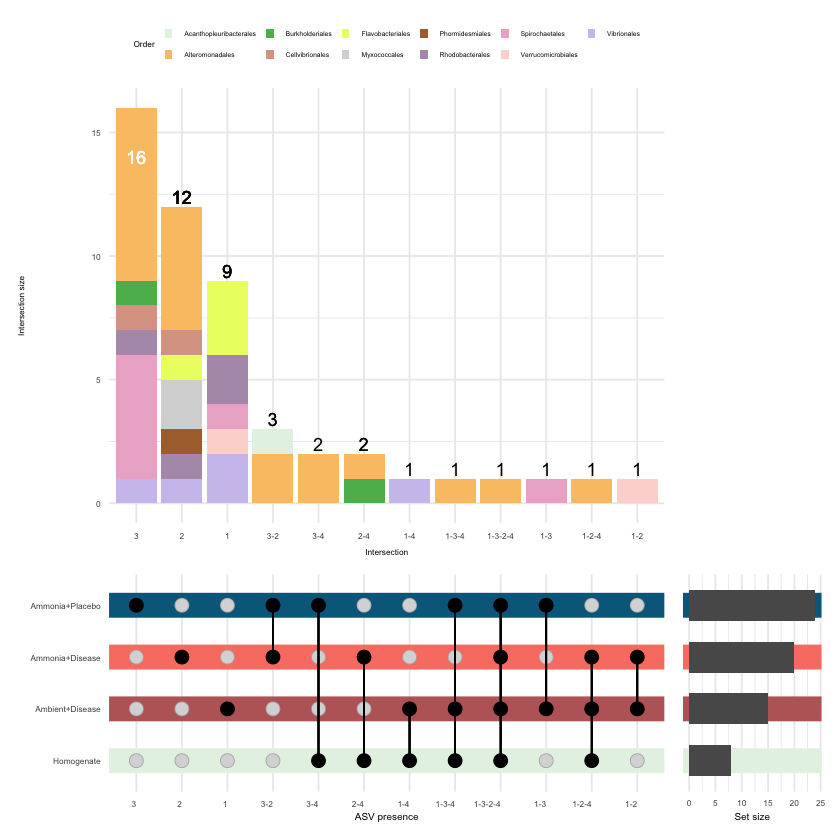

In [22]:
ComplexUpset::upset(
  upset_data,
  #intersect = c( "Ammonia+Placebo", "Ambient+Disease", "Ammonia+Disease", "Homogenate"),
    intersect = c( "Ambient+Disease", "Ammonia+Placebo", "Ammonia+Disease", "Homogenate"),
  name = "ASV presence",
  base_annotations = list(
    'Intersection size' = intersection_size(
      aes(fill = Order)  
    ) +
    scale_fill_manual(values = c(

  "#e5f2e5",  # minty white
 "#fac472",  # warm peach
  "#5cb85c",  # soft green
  "#dba494",  # muted rose
  "#ecfa72",  # neon yellow-green
  "#d6d6d6",  # light gray
  "#AD6F3B",  # burnt sienna
  "#b39bb7",  # lavender gray
  "#ecb2cd",  # soft pink
  "#fdd8d4",  # pale salmon
  "#cec3ee",  # pale lavender
  "#5E738F",  # slate blue
  "#F2B5D4",  # light mauve
  "#C8E6C9",  # pale green
  "#FFDD94",  # soft yellow
  "#B0BEC5",  # blue-gray
  "#D1C4E9",  # lavender
  "#A1887F",  # taupe
  "#FFD3B6",  # soft apricot
  "#AED581",  # light olive green
  "#F48FB1",   # cotton candy pink
  "#80CBC4",  # muted teal
  "#FFAB91",  # soft coral,
 "#e5f2e5"  # minty white
    )
    ) +
       labs(x = "\nIntersection") +
    theme(
      axis.title.x = element_text(size = 5),
      axis.title.y = element_text(size = 5),
      axis.text.x = element_text(size = 5),
      axis.text.y = element_text(size = 5),
        legend.text = element_text(size = 4),
    legend.title = element_text(size = 5) 
    ) +
      guides(fill = guide_legend(keywidth = 0.40, , keyheight =.50, nrow=2, position = 'top'))
  ),
     set_sizes = upset_set_size(position="right"),
    width_ratio = 0.2,
  stripes = c( "#e5f2e5", '#bc6767', 'salmon', "#00688B"),
themes = upset_modify_themes(
  list(
    'plot' = theme(),
    'intersections_matrix' = theme(
      plot.margin = margin(0, 0, 0, 0),
      axis.text.y = element_text(size = 5),
      axis.text.x = element_text(size = 5, hjust = 1),
      axis.title.x = element_text(size = 6)
    ),
    'overall_sizes' = theme(
      axis.text.x = element_text(size = 5),
      axis.title.x = element_text(size = 6)
    ),
    'set_sizes' = theme(
      plot.margin = margin(0, 0, 0, -1)
    )
  )
)
  )   
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Fig3.png", 
      width = 5, height = 4.5, units = "in", dpi=300)

In [23]:
select=c("NH4_Pathogen", "Ambient_Pathogen")
ps_disease <- subset_samples(ps_Clipped, Combo %in% select)
ps_disease

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 79 samples ]:
sample_data() Sample Data:        [ 79 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [24]:

# Create presence/absence columns for each set
join_data <- full_join(disease %>% select(ASVs) %>% mutate(Disease = TRUE),
                        nutri_disease %>% select(ASVs) %>% mutate(Nutri_Disease = TRUE),
                        by = "ASVs")



upset_data <- join_data %>%
  left_join(disease %>% select(ASVs, Order) %>% rename(Order_disease = Order), by = "ASVs") %>%
  left_join(nutri_disease %>% select(ASVs, Order) %>% rename(Order_nutri_disease = Order), by = "ASVs") %>%
  mutate(Order = coalesce(Order_disease, Order_nutri_disease)) %>%
  select(-Order_disease, -Order_nutri_disease) %>% rename(
    `Ambient+Disease` = Disease,
    `Ammonia+Disease` = Nutri_Disease
  ) 
head(upset_data)

,ASVs,Ambient+Disease,Ammonia+Disease,Order
,<chr>,<lgl>,<lgl>,<chr>
1,ASV_6816,TRUE,NA,Rhodobacterales
2,ASV_6577,TRUE,NA,Rhodobacterales
3,ASV_6512,TRUE,NA,Spirochaetales
4,ASV_9971,TRUE,NA,Spirochaetales
5,ASV_5096,TRUE,NA,Flavobacteriales
6,ASV_1718,TRUE,NA,Flavobacteriales


In [25]:
# Pull the ASV list from upset_data
asvs_upset <- upset_data %>%
  distinct(ASVs) %>%
  pull(ASVs)

# Extract taxonomy table as dataframe
tax_df <- tax_table(ps_disease) %>%
  as.data.frame() %>%
  tibble::rownames_to_column("ASV_id")  # the true internal ASV IDs


# Ensure the column is character type
tax_df$ASVs <- as.character(tax_df$ASVs)


# Filter only rows where ASVs are in upset_data list
overlapping_asvs <- tax_df %>%
  filter(ASVs %in% asvs_upset)


# Get ASV IDs for subsetting phyloseq
matching_ids <- overlapping_asvs$ASV_id

ps_overlap <- prune_taxa(matching_ids, ps_disease)

# Turn ASV table into a dataframe
otu_df <- otu_table(ps_overlap) %>%
  as.data.frame() %>%
  tibble::rownames_to_column("ASV_id")

# Merge OTU table with taxonomy
otu_tax <- left_join(otu_df, tax_df, by = "ASV_id")

In [26]:
#get only overlapping taxa
ps_overlap
head(otu_table(ps_overlap))
ps_homgenate
head(otu_table(ps_homgenate))

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 32 taxa and 79 samples ]:
sample_data() Sample Data:        [ 79 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 32 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 32 tips and 30 internal nodes ]:
taxa are rows

,N115-247,N265-A066,N266-A104,N268-A180,N269-A181,N270-A182,N271-228,N272-230,N273-358,N274-A011,⋯,N193-238,N81-A021,N83-A046,N84-A030,N89-A053,N90-A039,N91-A041,N93-A121,N97-205,N98-253
ac6820155a85d9cc15f8f62406e10e42,94,0,163,110,154,118,0,0,0,792,⋯,0,170,0,0,0,0,0,160,211,206
a5997412dbc7bdf31e2f533103884dbe,75,41,100,0,0,0,0,0,0,644,⋯,0,131,0,133,0,0,0,85,0,0
09f2b55ea4f56193699d46368ecbff40,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6a0c68e241fa05fa8e12abab05ecd055,0,0,0,0,0,0,0,0,0,0,⋯,0,91,0,0,0,0,0,19,0,0
a3c29bcb6997cfe572a474e58291af1d,0,0,855,0,0,0,0,0,0,207,⋯,0,0,0,0,0,0,0,0,0,0
fbf223bb93699d402bbd29e8af110807,0,0,669,0,0,0,0,0,0,180,⋯,0,0,0,0,0,0,0,0,0,0


phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 266 taxa and 2 samples ]:
sample_data() Sample Data:        [ 2 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 266 taxa by 8 taxonomic ranks ]:
taxa are rows

,N88-Hom-Hea,N88-Hom-Hea-R2
660989d135c32adbda92de9dcb42e8ac,152,0
cff058569d42d4269cf5defaa1744a49,22,0
2b142a17f059a3466d2489ec8363baec,48,71
3c783d612386a2fb9b066f8c3ab60b85,0,68
06d47ed0fde5e28a93a7d08f28a31cf7,183,0
9cfe430f4fe4f0e0b4059f0167301cf5,52,0


In [27]:
# Get ASVs  present in ps_homgenate
asvs_to_keep <- taxa_names(prune_taxa(taxa_sums(ps_homgenate) > 0, ps_homgenate))

# Prune ps_overlap to keep only those ASVs
ps_overlap_filtered <- prune_taxa(asvs_to_keep, ps_overlap)
ps_overlap_filtered
ps_overlap_filtered <- prune_taxa(taxa_sums(ps_overlap_filtered) > 0, ps_overlap_filtered)
ps_overlap_filtered

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 6 taxa and 79 samples ]:
sample_data() Sample Data:        [ 79 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 6 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 6 tips and 4 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 6 taxa and 79 samples ]:
sample_data() Sample Data:        [ 79 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 6 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 6 tips and 4 internal nodes ]:
taxa are rows

In [28]:
sum_Clipped = ps_Clipped %>%
  tax_glom(taxrank = "ASVs") %>%
  
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance

  psmelt()
head(sum_Clipped)

,OTU,Sample,Abundance,sample_names,featurecounts,Initial_sample_ID,Tag,start_date,event_date,collection_date,⋯,X515FB_Forward_Primer,Primer_For_PCR,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,52eb7d4714a43111031b1cb7ffe49f02,N131-200,0.5307692,N131-200,650,131,200,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCCGTACTTGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Crocinitomicaceae,g__Fluviicola,NA,ASV_3350
2,ff3e7637bd5aac86cff3b72f9ee78f47,N131-200,0.3092308,N131-200,650,131,200,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCCGTACTTGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
3,ff3e7637bd5aac86cff3b72f9ee78f47,N190-261,0.1842391,N190-261,26641,190,261,8/19/20,11/9/20,11/9/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
4,ff3e7637bd5aac86cff3b72f9ee78f47,N85-A055,0.1798367,N85-A055,31470,85,A055,8/19/20,11/3/20,11/3/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
5,ff3e7637bd5aac86cff3b72f9ee78f47,N182-A069,0.1794531,N182-A069,32430,182,A069,8/19/20,11/8/20,11/8/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105
6,ff3e7637bd5aac86cff3b72f9ee78f47,N141-A103,0.1791332,N141-A103,23261,141,A103,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,ASV_10105


In [29]:
pathogen <- c( "ASV_9604", "8740", "7693", "5096", "1718", "7518")

In [30]:

ps_homgenate=subset_samples(ps, Type=="Homogenate"& sample_names %in% first_hom)
ps_homgenate

ps_homgenate = filter_taxa(ps_homgenate, function(x) sum(x > 0) > (0.0*length(x)), TRUE)
ps_homgenate 

                           
                 

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 2 samples ]:
sample_data() Sample Data:        [ 2 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 266 taxa and 2 samples ]:
sample_data() Sample Data:        [ 2 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 266 taxa by 8 taxonomic ranks ]:
taxa are rows

In [31]:
# Get ASVs from each phyloseq object
asvs_homgenate <- taxa_names(ps_homgenate)
asvs_clipped <- taxa_names(ps_Clipped)

# Find shared ASVs
shared_asvs <- intersect(asvs_homgenate, asvs_clipped)

# Prune both objects to keep only shared ASVs
ps_homgenate_shared <- prune_taxa(shared_asvs, ps_homgenate)
ps_clipped_shared <- prune_taxa(shared_asvs, ps_Clipped)

# Merge the pruned objects
homo_path <- merge_phyloseq(ps_homgenate_shared, ps_clipped_shared)
homo_path 

homo_path=subset_samples(homo_path, Type!="Homogenate" & Combo != "NA_Placebo")
homo_path

homo_path=subset_taxa(homo_path, Order != " o__Rickettsiales")
homo_path

melt_homogenate   <- homo_path %>% 

  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)*100} ) %>% # Transform to rel. abundance
  psmelt()   

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 266 taxa and 194 samples ]:
sample_data() Sample Data:        [ 194 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 266 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 266 tips and 260 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 266 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 266 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 266 tips and 260 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 245 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 245 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 245 tips and 241 internal nodes ]:
taxa are rows

In [32]:
ps_Clipped 

sum_Clipped = ps_Clipped %>%
subset_taxa(Order != " o__Rickettsiales")  %>%
  tax_glom(taxrank = "ASVs") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance

  psmelt()
head(sum_Clipped)

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

,OTU,Sample,Abundance,sample_names,featurecounts,Initial_sample_ID,Tag,start_date,event_date,collection_date,⋯,X515FB_Forward_Primer,Primer_For_PCR,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5c60e2b54b28bc324cba8258d5135f6c,N287-A078,1.0000000,N287-A078,19272,287,A078,8/19/20,11/10/20,11/10/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTAGCGTGCGTTTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__NS9_marine_group,g__NS9_marine_group,NA,ASV_3703
2,52eb7d4714a43111031b1cb7ffe49f02,N131-200,0.7683742,N131-200,650,131,200,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCCGTACTTGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Crocinitomicaceae,g__Fluviicola,NA,ASV_3350
3,66760a62cc03e185f372c9797b2b48a9,N129-165,0.7196970,N129-165,27829,129,165,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTATGTGCTGCTCGTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Endozoicomonadaceae,g__Endozoicomonas,s__Acropora_cervicornis,ASV_4109
4,97f533eaf87b00b280b0d77c39bb42c8,N141-A103,0.6497890,N141-A103,23261,141,A103,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,s__uncultured_Spirochaetes,ASV_6052
5,c82ca3e77526f2854e4e1cdf726e40c9,N14-A040,0.6256158,N14-A040,38951,14,A040,8/19/20,10/28/20,10/28/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTTTGAACAAGCCATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Endozoicomonadaceae,g__Endozoicomonas,s__Acropora_cervicornis,ASV_7953
6,e23bbf8f65f14f451c2071e477ed2b58,N280-A158,0.5600000,N280-A158,46477,280,A158,8/19/20,11/10/20,11/10/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGATGAATATCGTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Shimia,NA,ASV_8980


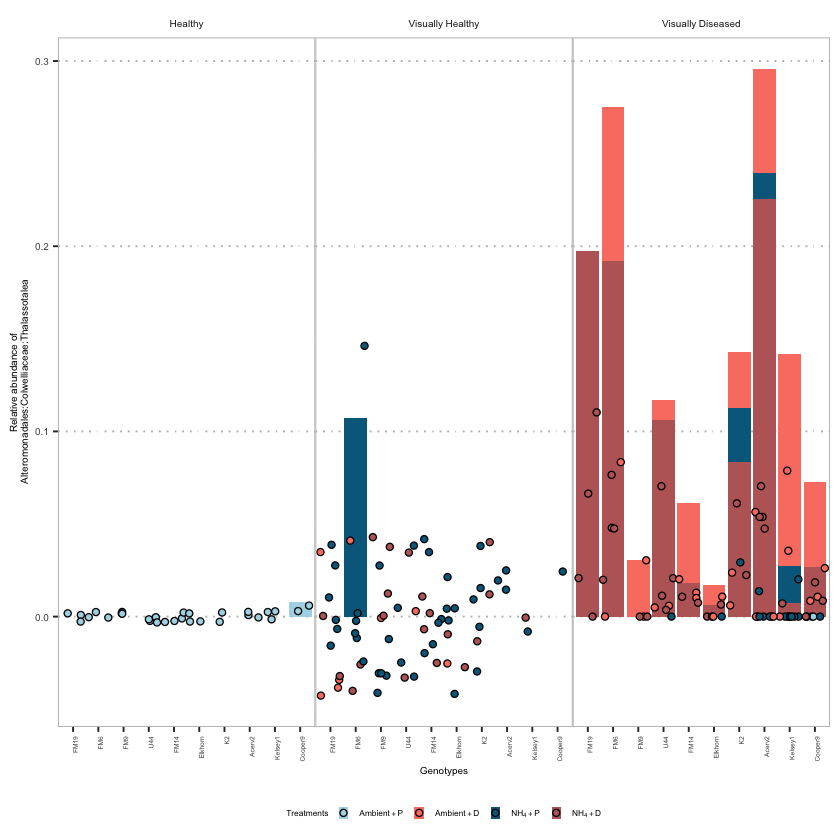

In [33]:

lab1 <- c(expression(Ambient+P),
          expression(Ambient+D), 
          expression(NH[4]+P),
          expression(NH[4]+D))


lab2 =Health <- as_labeller(c(
  "Healthy" = "Healthy",
  "Unaffected" = "Visually~Healthy",
  "Unhealthy" = "Visually~Diseased"
), default = label_parsed)


sum_Clipped$Combo <- factor(
sum_Clipped$Combo, 
  levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen")
)

prefix_order <- c("FM19", "FM6", "FM9", "U44", "FM14", "Elkhorn", "K2", "Acerv2", "Kelsey-1", "Cooper-9")


sum_Clipped %>%
filter(filter_unpair=="no") %>%

  filter(
      filter_unpair=="no",
    ASVs %in% pathogen,
    Combo != "NA_Placebo"
  ) %>%
  
  mutate(
    across(where(is.character), ~ str_replace_all(.x, "o__", "")),
    across(where(is.character), ~ str_replace_all(.x, "g__", "")),
    across(where(is.character), ~ str_replace_all(.x, "ASV_", "")),
    #across(where(is.character), ~ str_replace_all(.x, "DL", "VD")),
    #across(where(is.character), ~ str_replace_all(.x, "AH", "VH"))
  ) %>%
  
  ggplot(aes(x = Genotype, y = Abundance, fill = Combo)) +
  
  #geom_boxplot(outlier.size = 0.5, outlier.shape = 21) +
geom_bar(stat = "identity", position = "stack") +
geom_jitter(shape=21) +
  
    #scale_color_manual("Treatments", values = c("lightblue", "salmon", "#00688B", "#bc6767"), labels = lab1) +
  scale_fill_manual("Treatments", values = c("lightblue", "salmon", "#00688B", "#bc6767"), labels = lab1) +

  theme_pubclean() +
  theme(
    strip.background = element_blank(),
    axis.title.x = element_text(size = 6),
    axis.title.y = element_text(size = 6),
    #axis.text.x = element_blank(),
    axis.text.y = element_text(size = 6),
    strip.text.y.left = element_text(angle = 90, size = 4),
    strip.text.x = element_text(size = 6),
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines"),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    panel.border = element_rect(color = "grey", fill = NA),
    legend.position = "bottom",
  axis.text.x = element_text(angle = 90, hjust = 1, size = 4)
                            ) +
  
  scale_x_discrete(drop = TRUE) +
  
  facet_grid( .~Outcome, 
             space = "free", scales = "free", switch = "y",
             labeller = labeller(Outcome = lab2)) +
  
  guides(fill = guide_legend(keywidth = 0.5, keyheight = 0.60, nrow =1 )) +
guides(color = guide_legend(keywidth = 0.5, keyheight = 0.35, nrow =1)) +
  
  xlab("Genotypes") +
 ylab("Relative abundance of\n Alteromonadales:Colwelliaceae:Thalassotalea")
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Fig4.png", 
     width =5, height = 4, units = "in", dpi=300)

In [34]:
# samples without ASV 9604
samples_no_alter=sum_Clipped %>%
filter(filter_unpair=="no") %>%
  filter(
      filter_unpair=="no",
    ASVs %in% pathogen,
    Combo != "NH4_Placebo",
      Outcome=="Unhealthy",
    Combo != "NA_Placebo",
     Abundance!=0
  ) 
head(samples_no_alter)

#73=31-42
#52=39-13=75


samples_no_alter$sample_names
samples_no_alter$Genotype

,OTU,Sample,Abundance,sample_names,featurecounts,Initial_sample_ID,Tag,start_date,event_date,collection_date,⋯,X515FB_Forward_Primer,Primer_For_PCR,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,f242850c598d509ac98aea5999f2779f,N120-183,0.11027879,N120-183,30622,120,183,8/19/20,11/5/20,11/5/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604
2,f242850c598d509ac98aea5999f2779f,N191-243,0.08341079,N191-243,31490,191,243,8/19/20,11/9/20,11/9/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604
3,f242850c598d509ac98aea5999f2779f,N173-A095,0.07880544,N173-A095,45816,173,A095,8/19/20,11/7/20,11/7/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604
4,f242850c598d509ac98aea5999f2779f,N162-232,0.07652067,N162-232,41133,162,232,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCTGTGGATTATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604
5,f242850c598d509ac98aea5999f2779f,N116-A058,0.07041914,N116-A058,50041,116,A058,8/19/20,11/5/20,11/5/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604
6,f242850c598d509ac98aea5999f2779f,N161-A067,0.07038873,N161-A067,34721,161,A067,8/19/20,11/6/20,11/6/20,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTATCGTAGTGGTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Colwelliaceae,g__Thalassotalea,NA,ASV_9604


[1] "N120-183"  "N191-243"  "N173-A095" "N162-232"  "N116-A058" "N161-A067"
 [7] "N137-A195" "N117-163"  "N192-A057" "N90-A039"  "N91-A041"  "N115-247" 
[13] "N98-253"   "N83-A046"  "N112-A005" "N153-208"  "N84-A030"  "N122-A170"
[19] "N136-A161" "N118-176"  "N181-A102" "N186-264"  "N193-238"  "N100-A027"
[25] "N114-281"  "N163-A129" "N154-A087" "N157-265"  "N113-A016" "N130-283" 
[31] "N81-A021"  "N132-A031" "N165-296"  "N138-A094" "N174-A084" "N133-A164"
[37] "N179-A113" "N93-A121"  "N166-A111"

[1] FM19    FM6     Kelsey1 FM6     Acerv2  U44     FM19    K2      Acerv2 
[10] Acerv2  Acerv2  FM6     FM6     Acerv2  Kelsey1 FM9     Cooper9 K2     
[19] K2      FM19    U44     FM14    FM6     Cooper9 FM14    U44     Elkhorn
[28] FM14    Cooper9 FM14    Cooper9 Cooper9 FM14    Kelsey1 Elkhorn K2     
[37] U44     U44     U44    
Levels: FM19 FM6 FM9 U44 FM14 Elkhorn K2 Acerv2 Kelsey1 Cooper9

In [35]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.6.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ComplexUpset_1.3.6   speedyseq_0.5.3.9021 ggpubr_0.6.0        
 [4] microViz_0.12.7      lubridate_1.9.4      forcats_1.0.0       
 [7] stringr_1.5.1        dplyr_1.1.4          purrr_1.0.4         
[10] readr_2.1.5          tidyverse_2.0.0      microbiome_1.30.0   
[13] phyloseq_1.52.0      ggplot2_4.0.0        tibble_3.3.0        
[16] tidyr_1.3.1          qiime2R_0.99.6       ANCOMBC_2.10.0      

loaded vi